In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

sns.set(style='whitegrid')

In [4]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### kind='line' : Line Plot 생성
plot에서 선 옆으로 넓고 연한 영역은 95%의 신뢰구간을 뜻함

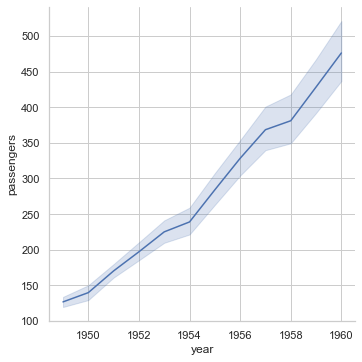

In [6]:
sns.relplot(x='year', y='passengers', kind='line', data=flights);

In [11]:
dots = sns.load_dataset('dots')
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


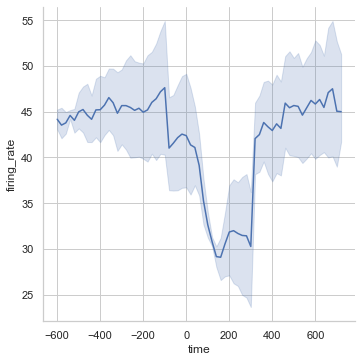

In [12]:
sns.relplot(x='time', y='firing_rate', 
            kind='line', data=dots);

### ci: 신뢰구간

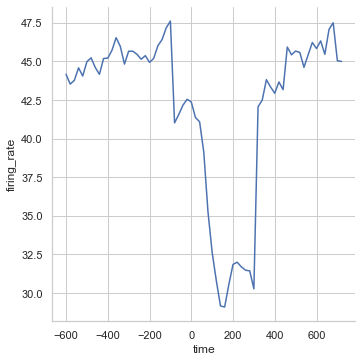

In [14]:
sns.relplot(x='time', y='firing_rate',
            kind='line', ci=None, data=dots);

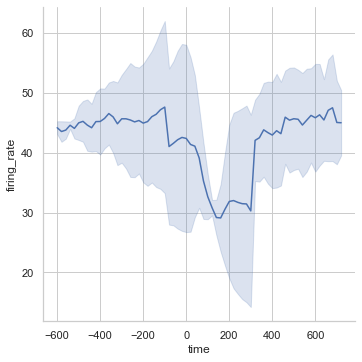

In [16]:
# 신뢰구간 대신 표준편차로 영역을 지정하고 싶으면 ci='sd'옵션을 추가한다.
sns.relplot(x='time', y='firing_rate',
            kind='line', data=dots, ci="sd");

### estimator
- 위의 그래프가 firing_rate에 대한 집계(여기선 np.mean)값이다.
- 만약 단순히 변량들의 단순 변화를 보고 싶다면 estimator=None을 추가하면 됌
- 더불어 다른 함수를 집계 함수로 설정하고 싶다면 estimator에 설정을 바꾸면 가능

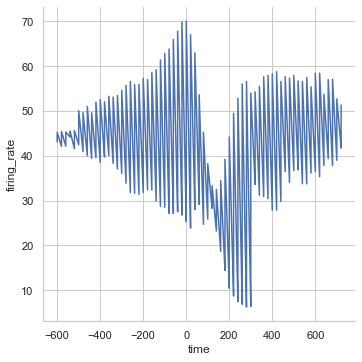

In [18]:
sns.relplot(x='time', y='firing_rate',
           kind='line', data=dots, estimator=None);

hue하는 대상이 카테고리형 변수면 seaborn이 이를 자동적으로 나누어 그래프를 형성시키게 한다.

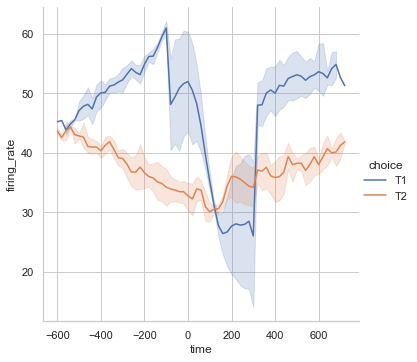

In [19]:
sns.relplot(x='time',y='firing_rate', hue='choice',
           kind='line', data=dots);

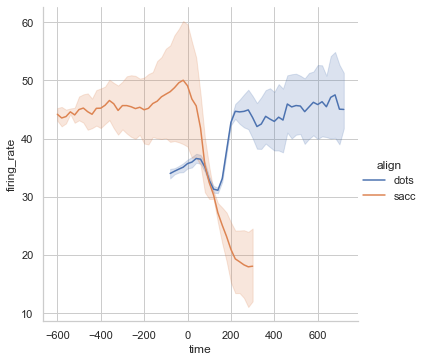

In [20]:
sns.relplot(x='time', y='firing_rate', hue='align', 
            kind='line',data=dots);

### style
- dash나 marker를 통해 차원을 하나 더 추가하고 표시한다.
- dashes=True: style을 통한 차원 추가를 dash를 추가함으로써 표기한다.
- markers=True: style을 통한 차원 추가를 marker를 추가함으로써 표기한다.

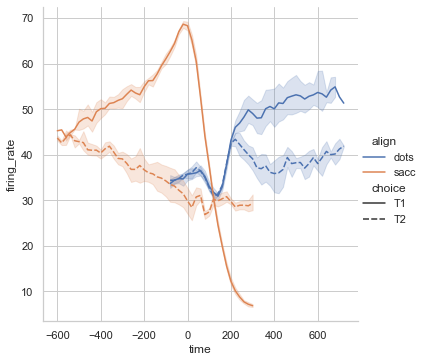

In [21]:
sns.relplot(x='time', y='firing_rate',
            hue='align', style='choice',
            kind='line', data=dots);

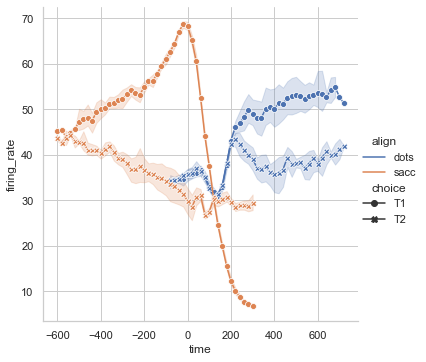

In [24]:
sns.relplot(x='time', y='firing_rate',
            hue='align', style='choice',
            kind='line', data=dots,
            dashes=False, markers=True);

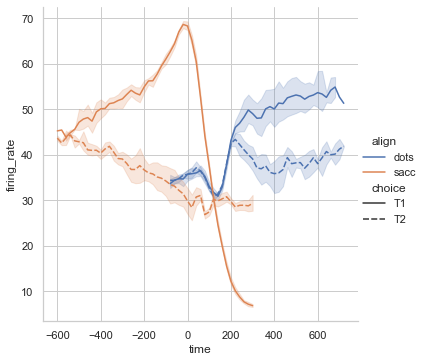

In [27]:
sns.relplot(x='time', y='firing_rate',
            hue='align', style='choice',
            kind='line', data=dots,
            dashes=True, markers=False);

### col
-  지정된 속성의 갯수(예에서는 choice의 unique값) 만큼 표를 따로 그린다

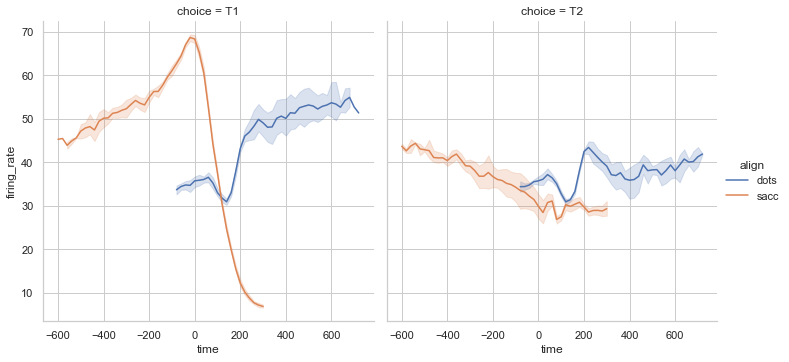

In [28]:
sns.relplot(x='time', y='firing_rate',
            hue='align', data=dots,
            kind='line', col='choice');

### query문을 통한 데이터 크기 제한
- data 자체에 query문을 작성하여 데이터 자체의 크기를 제한할 수 있다.

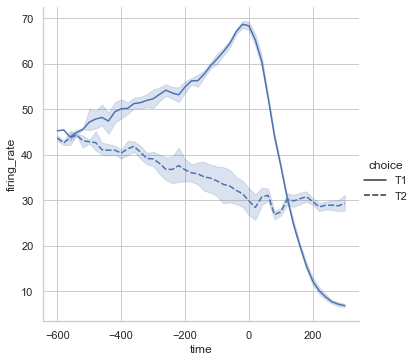

In [29]:
sns.relplot(x='time', y='firing_rate',
            data=dots.query("align == 'sacc'"),
            kind='line', style='choice');

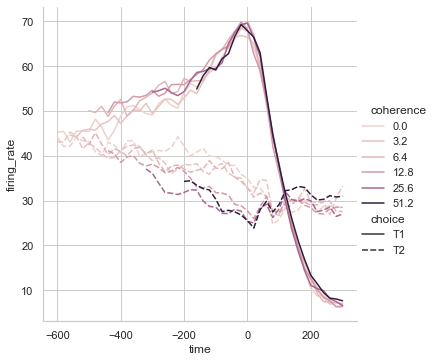

In [30]:
sns.relplot(x='time', y='firing_rate',
            data=dots.query("align == 'sacc'"),
            kind='line', hue='coherence', style='choice');

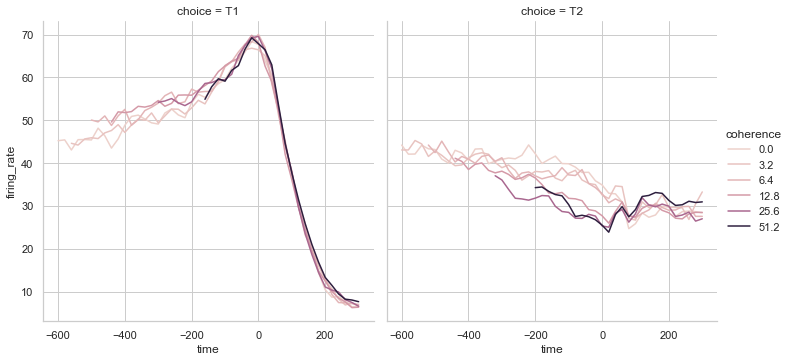

In [31]:
sns.relplot(x='time', y='firing_rate',
            data=dots.query("align=='sacc'"),
            kind='line', hue='coherence', col='choice');

In [34]:
fmri= sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


### sort
- fmri의 timepoint의 값이 정렬되어 있지 않지만 seaborn에서 이를 자동적으로 sort하여 표현함
- sort 옵션을 False로 하여 이를 제거할 수 있음

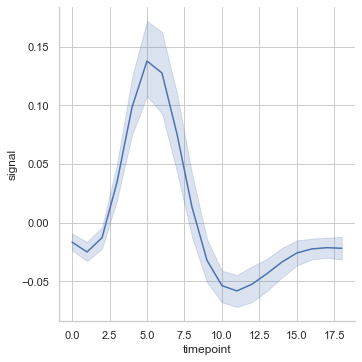

In [36]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri);

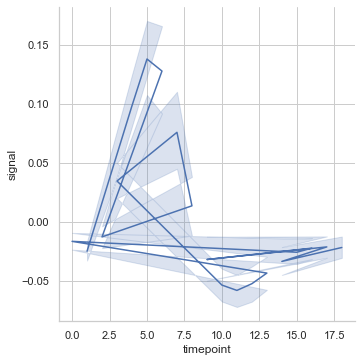

In [37]:
sns.relplot(x='timepoint', y='signal',
            sort=False, kind='line', data=fmri);

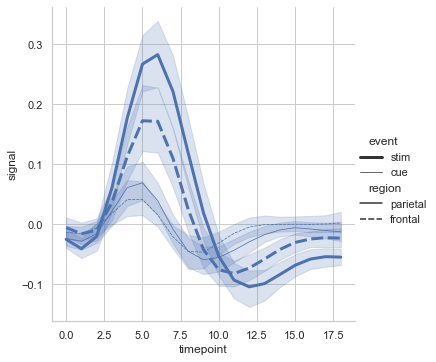

In [39]:
sns.relplot(x='timepoint', y='signal', 
            style='region', size='event', 
            kind='line', data=fmri);

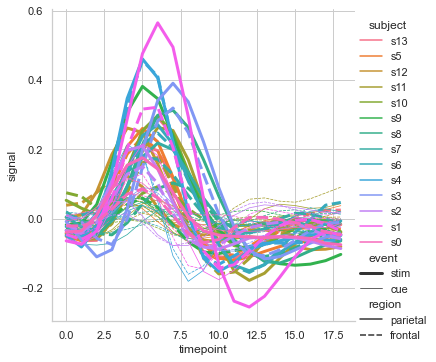

In [41]:
sns.relplot(x='timepoint', y='signal',
            hue='subject', style='region', size='event',
            kind='line', data=fmri);

### palette
"cubehelix_palette를 지정해서 원하는 색상 조합을 이용할 수 있다."
- 단, hue 속성값의 갯수와 같은 n_colors를 지정해 주어야 한다.

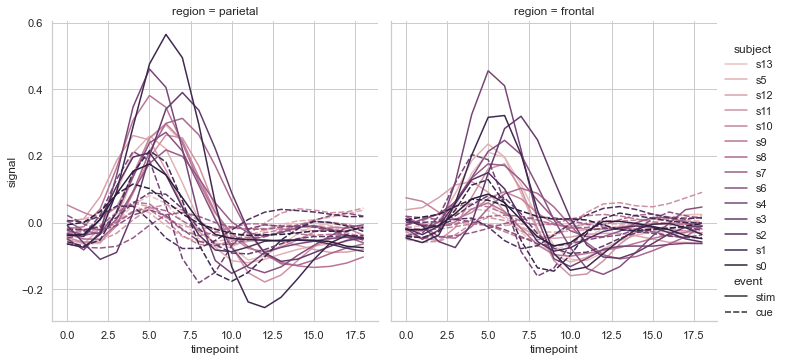

In [49]:
palette = sns.cubehelix_palette(n_colors=14, light=0.8)
sns.relplot(x='timepoint', y='signal', 
            hue='subject', col='region',
            style='event', kind='line',
            palette=palette, data=fmri);

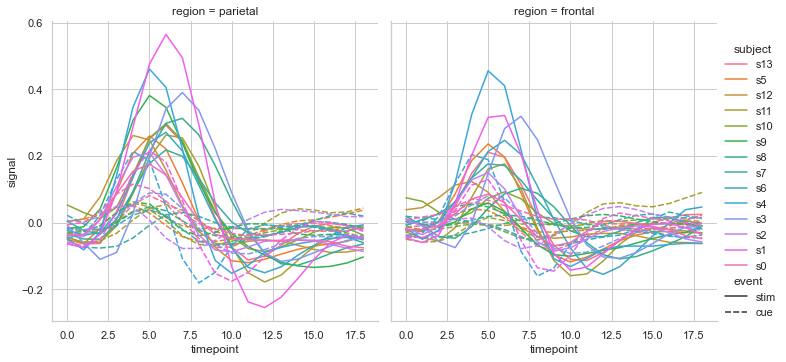

In [50]:
sns.relplot(x='timepoint', y='signal', 
            hue='subject', col='region',
            style='event', kind='line',
            data=fmri);

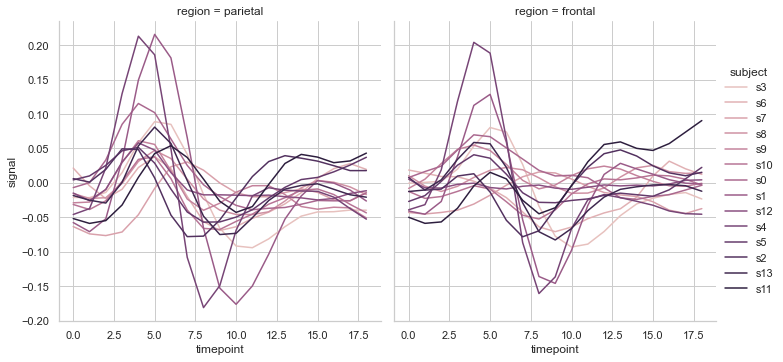

In [52]:
palette = sns.cubehelix_palette(n_colors=14, light=.8)
sns.relplot(x='timepoint', y='signal',
            hue='subject', col='region',
            palette=palette, kind='line',
            data=fmri.query("event=='cue'"));

### row
- row를 지정함으로써 열에도 또다른 속성값에 따라 그래프의 위치를 나눌 수 있다.

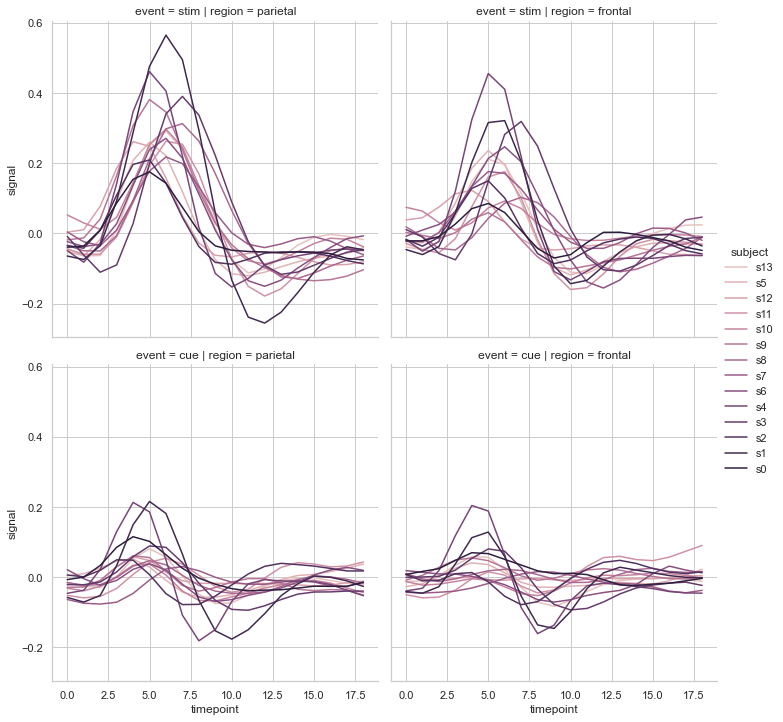

In [53]:
sns.relplot(x='timepoint', y='signal',
            hue='subject', kind='line',
            palette=palette, data=fmri, 
            col='region', row='event');

### col_wrap
- col의 값으로 나눠지는 값이 많을 때 col_wrap을 써서 한 열당 나올 수 있는 셀의 수를 제한할 수 있다.

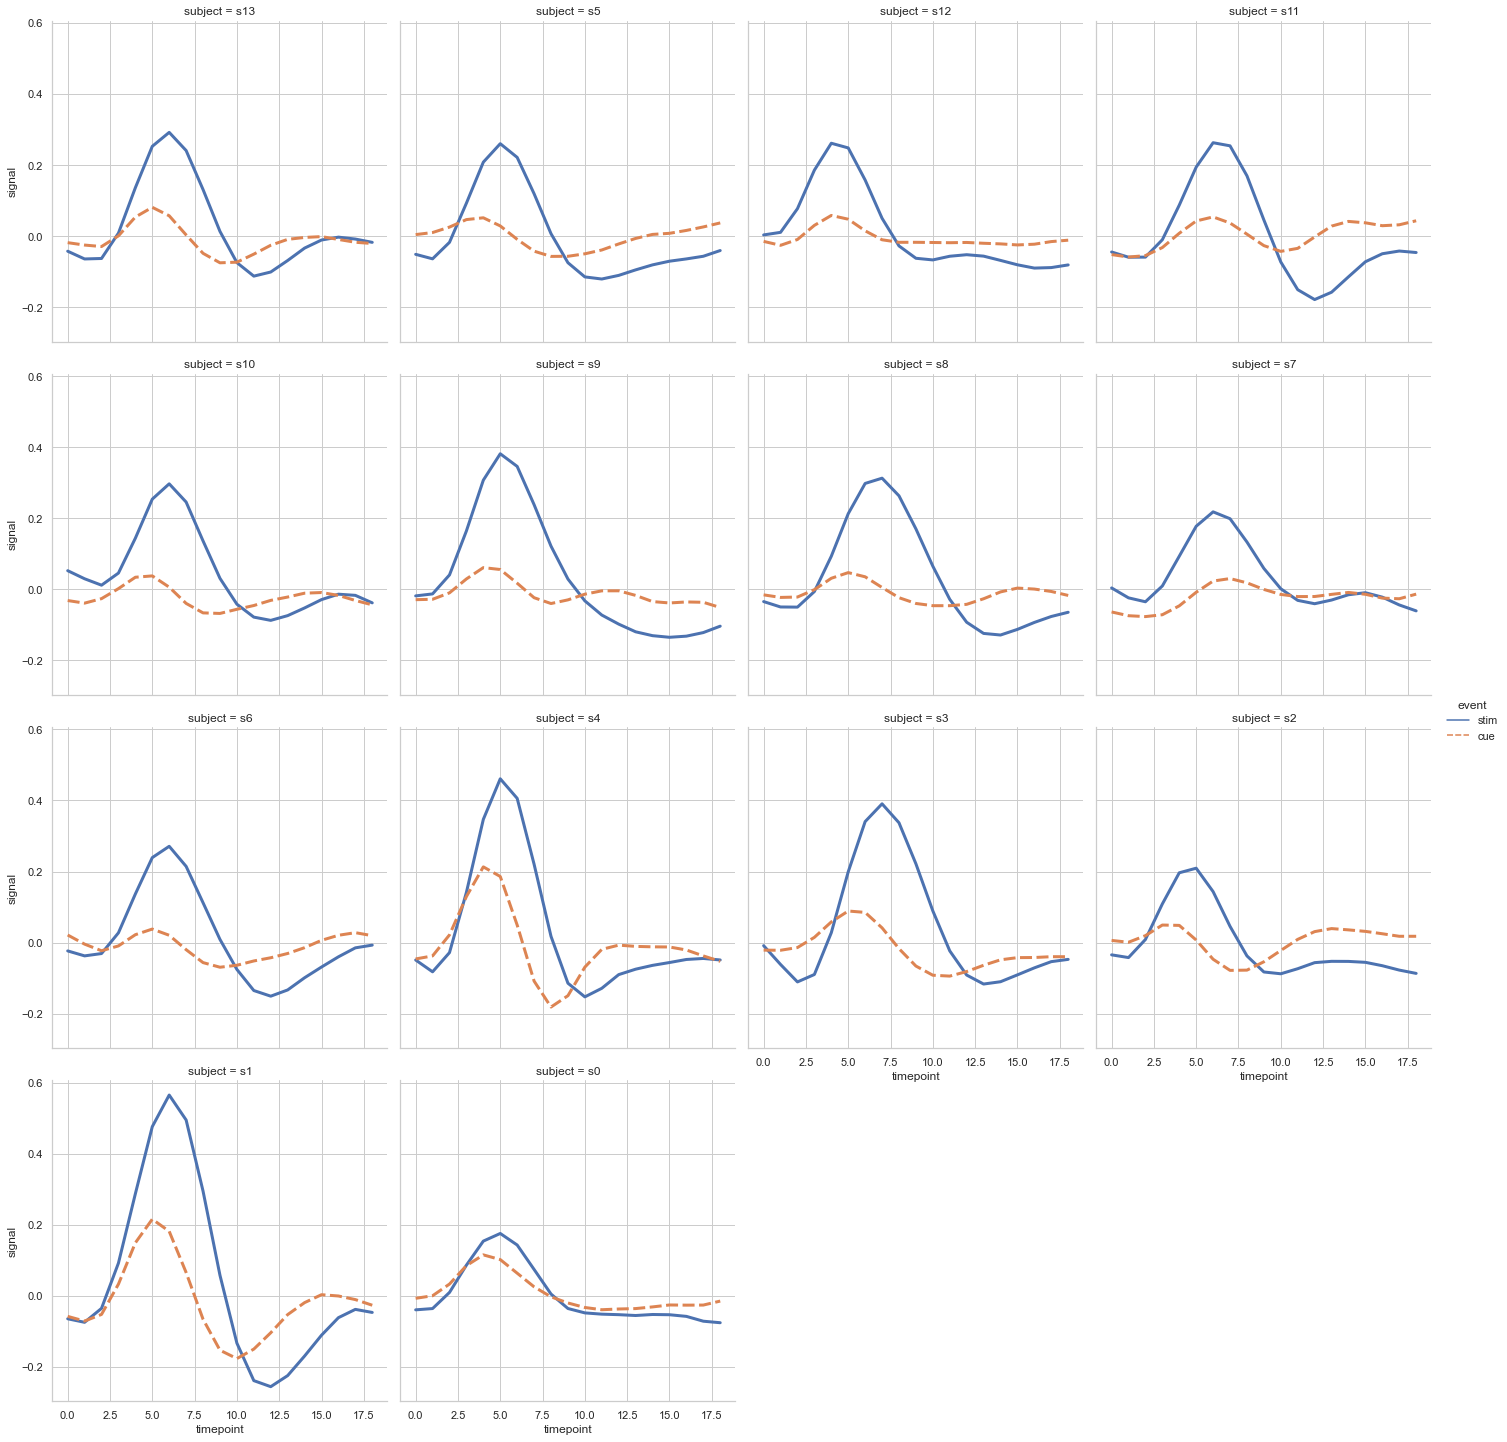

In [55]:
sns.relplot(x='timepoint', y='signal',
            hue='event', kind='line',
            style='event', col='subject',
            col_wrap=4, linewidth=3,
            data=fmri.query("region == 'parietal'"));

In [56]:
tdf = pd.DataFrame(np.random.randn(40, 4),
                   index=pd.date_range('2020-01-01', periods=40),
                   columns=['A','B','C','D'])
tdf.head()

,A,B,C,D
2020-01-01,1.197181,0.629579,-0.302780,1.299808
2020-01-02,1.079049,-0.081633,0.298248,0.446876
2020-01-03,0.320606,0.358121,0.474953,1.238508
2020-01-04,-0.453889,0.297062,0.876576,-0.985662
2020-01-05,-0.128770,0.447416,0.919500,-1.111953


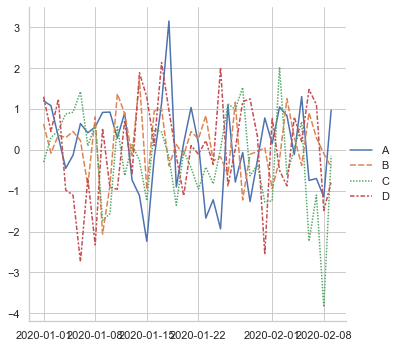

In [57]:
sns.relplot(kind='line', data=tdf);

### fig.autofmt_xdate
- x축이 날짜형식이여서 제대로 보이지 않을 때 자동으로 각도를 기울여 주는 기능

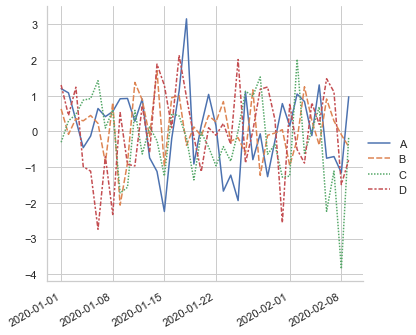

In [58]:
g = sns.relplot(kind='line', data=tdf);
g.fig.autofmt_xdate()

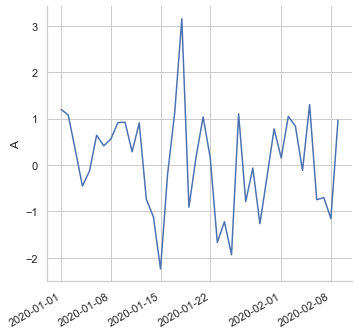

In [59]:
g = sns.relplot(kind='line', data=tdf['A']);
g.fig.autofmt_xdate()